### **EDA: BBDD HOSPITALIZACIÓN**

In [1]:
'''
Importación de librería PANDAS, y lectura del csv (base de datos) como dataframe.
'''
import pandas as pd

df = pd.read_csv('Copia de BBDD_Hospitalización.xlsx - Datos.csv')

**Paso 1:** Lidiar con valores nulos, convertir variables dicotómicas a 1 y 0 (dummies), reemplazar valores no correctos, guardar la base de datos a otro archivo : datos_limpios.

In [2]:
'''
Verificación de la data, valores nulos, lidiar con valores máximos (outliers), conversión de variables dicotómicas.
'''
#Valores nulos
df.dropna()

# Filtrar valores de la variable PSA menores o iguales a 28
df = df[df['PSA'] <= 28]

# Reemplazar valores de ENF. CRONICA PULMONAR OBSTRUCTIVA
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace({'SI, ASMA': 'SI', 'SI, EPOC': 'SI'})

# Reemplazar valores de NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace({'NO': 0})

# Reemplazar valores 'SI' y 'NO' por dicotómicas (1 y 0)
df= df.replace({'SI': 1, 'NO': 0})

# Guardar los datos limpios en un nuevo archivo si es necesario
df.to_csv("datos_limpios.csv", index=False)


**PASO 2:** Realizar la transformación de los datos, como el one hot encoding y eliminar variables. Guardar la base de datos a otro archivo: datos_transformados.

In [3]:
'''
Transformación de la base de datos, realizar el one hot econding y eliminar las primeras variables (Dias de hospitalización)
'''
df = pd.read_csv('datos_limpios.csv')
df = df.dropna()
# Realizar one-hot encoding de las variables categóricas
df = pd.get_dummies(df, columns=['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'BIOPSIA'])

# Eliminar las columnas DIAS HOSPITALIZACION MQ y DIAS HOSPITALIZACIÓN UPC
df = df.drop(['DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'], axis=1)

# Guardar los datos transformados en un nuevo archivo si es necesario
df.to_csv("datos_transformados.csv", index=False)

In [4]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,...,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS
0,53,0,0,4.0,0,1,12,0,0.0,1,...,False,False,False,False,False,False,False,False,True,False
1,56,0,0,7.7,0,1,12,0,0.0,1,...,False,False,False,False,False,False,False,False,True,False
2,56,0,0,7.0,0,1,12,0,0.0,1,...,False,False,False,False,False,False,False,False,True,False
3,55,1,1,4.0,0,1,12,0,0.0,2,...,False,False,False,False,False,False,False,False,True,False
4,53,0,0,7.0,0,1,12,0,0.0,2,...,False,False,False,False,False,False,False,False,True,False


**PASO 3:** Verificar la distribución de las variables numéricas.

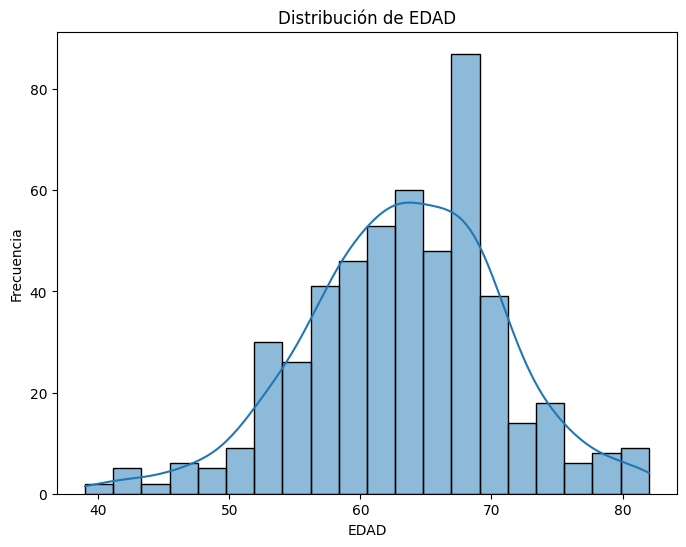

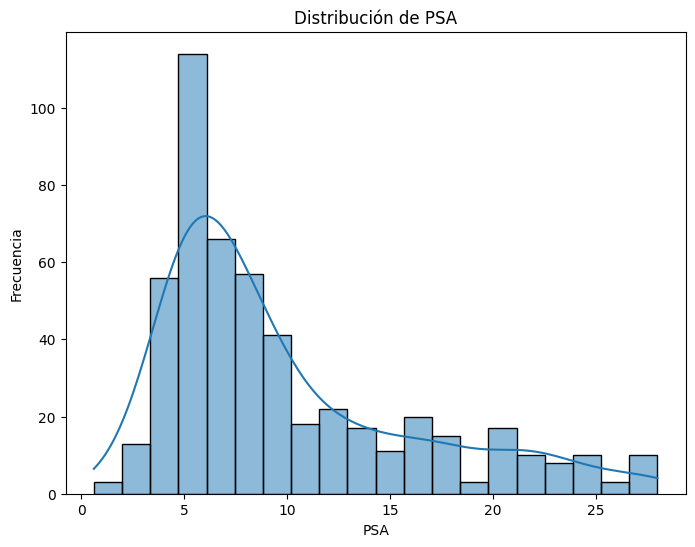

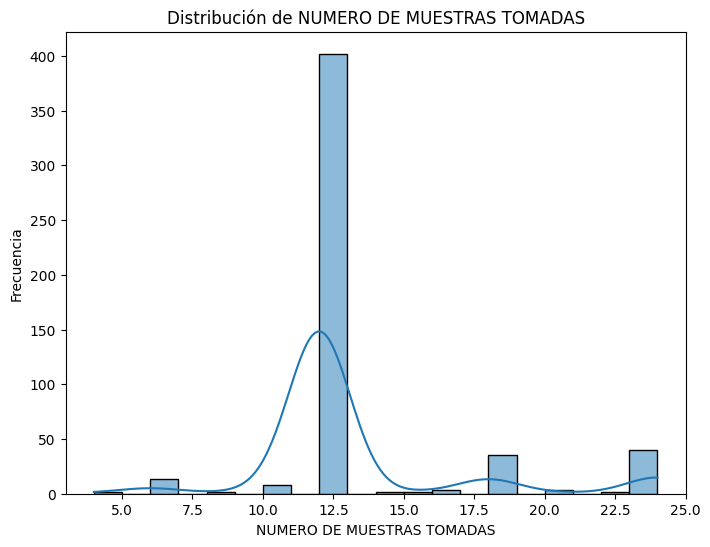

In [5]:
'''
Descripción estadística con gráficos.
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las variables numéricas de interés
variables_numericas = ['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS']
# Crear un bucle para trazar histogramas para cada variable numérica
for variable in variables_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[variable], bins=20, kde=True)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

**PASO 4:** Hacer oversampling para la variable objetivo, de este modo, no haya una mala predicción.

In [6]:
'''Cuantos valores SI y NO hay en la variable Hospitalización'''
df = pd.read_csv('datos_transformados.csv')

# Contar los valores de "SI" y "NO" en la variable "HOSPITALIZACIÓN"
conteo_hospitalizacion = df['HOSPITALIZACION'].value_counts()

print(conteo_hospitalizacion)

HOSPITALIZACION
0.0    493
1.0     21
Name: count, dtype: int64


In [9]:
!pip install imbalanced-learn

                                              0.0/235.6 kB ? eta -:--:--
     -----                                    30.7/235.6 kB ? eta -:--:--
     -----                                    30.7/235.6 kB ? eta -:--:--
     -----                                    30.7/235.6 kB ? eta -:--:--
     ---------                             61.4/235.6 kB 273.8 kB/s eta 0:00:01
     ------------------                   122.9/235.6 kB 516.7 kB/s eta 0:00:01
     ------------------                   122.9/235.6 kB 516.7 kB/s eta 0:00:01
     --------------------------           174.1/235.6 kB 499.5 kB/s eta 0:00:01
     -----------------------------        194.6/235.6 kB 513.4 kB/s eta 0:00:01
     -----------------------------        194.6/235.6 kB 513.4 kB/s eta 0:00:01
     -----------------------------        194.6/235.6 kB 513.4 kB/s eta 0:00:01
     -------------------------------      204.8/235.6 kB 389.1 kB/s eta 0:00:01
     -------------------------------      204.8/235.6 kB 389.1 kB


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\gmg\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Cargar tus datos desde un archivo CSV u otra fuente
df = pd.read_csv("datos_transformados.csv")

# Separar las características (X) y la variable objetivo (y)
X = df.drop('HOSPITALIZACION', axis=1)
y = df['HOSPITALIZACION']

# Aplicar SMOTE para oversample la clase minoritaria
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos oversampleados
df_oversampling = pd.concat([X_resampled, y_resampled], axis=1)

# Especificar el nombre del archivo CSV de salida
nombre_archivo_salida = "datos.csv"

# Guardar los datos oversampleados en el archivo CSV
df_oversampling.to_csv('datos.csv', index=False)

print(f"Datos oversampleados guardados en {nombre_archivo_salida}.")

Datos oversampleados guardados en datos.csv.


**PASO 5:** Realizar una matriz de correlación, eliminamos variable con nula correlación a la variable objetivo, guardamos la base de datos a otro archivo: datos_listos.

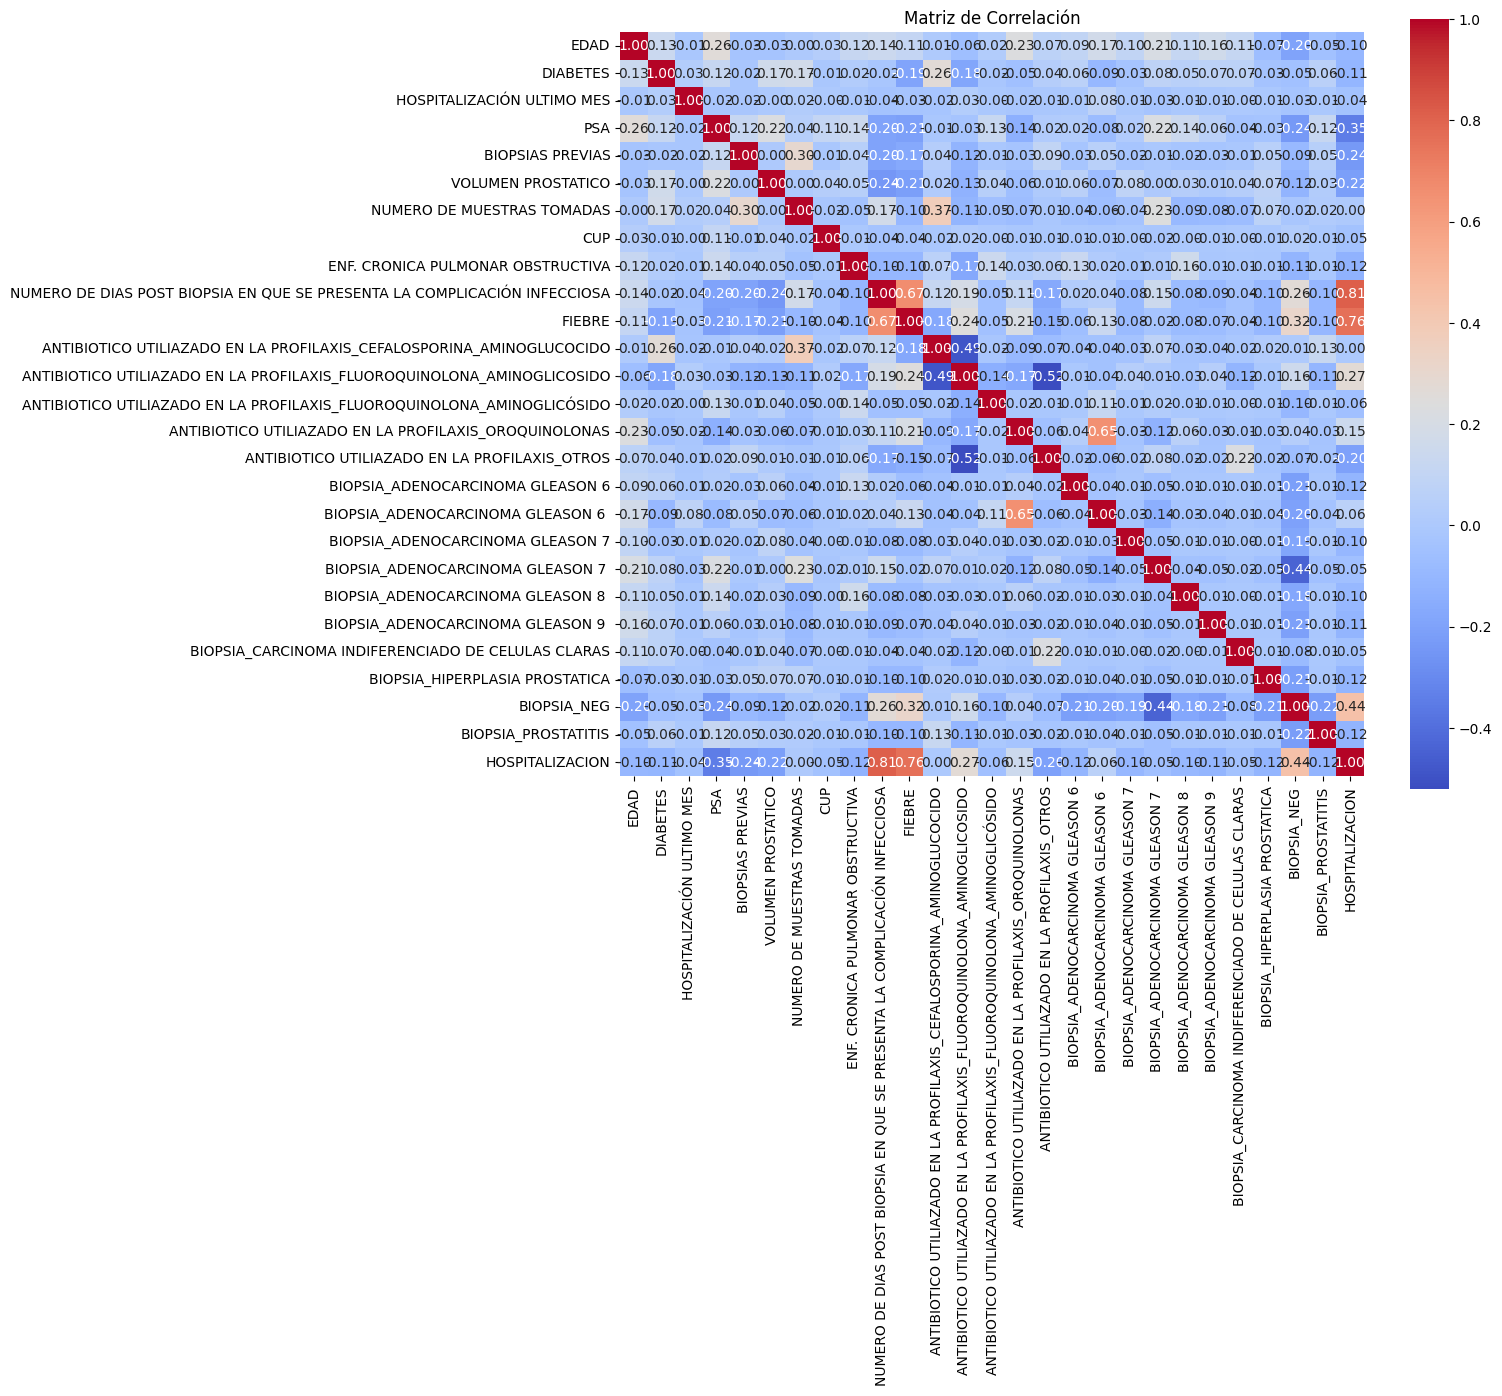

In [8]:
# Cargar tus datos desde un archivo CSV u otra fuente
df = pd.read_csv("datos.csv")

# Calcular la matriz de correlación
matriz_correlacion = df.corr()

# Crear una gráfica de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación')
plt.show()

In [9]:
# Cargar tus datos desde un archivo CSV u otra fuente
df = pd.read_csv("datos.csv")

# Eliminar las variables "CUP" y "NUMERO DE MUESTRAS TOMADAS"
df = df.drop(['CUP', 'NUMERO DE MUESTRAS TOMADAS'], axis=1)

# Guardar los datos actualizados en un nuevo archivo CSV
df.to_csv("datos_listos.csv", index=False)

print("Variables 'CUP' y 'NUMERO DE MUESTRAS TOMADAS' eliminadas y datos guardados.")

Variables 'CUP' y 'NUMERO DE MUESTRAS TOMADAS' eliminadas y datos guardados.
